In [1]:
import pandas as pd

In [2]:
marketing_data = pd.read_csv('doordash powers marketing.csv')

In [3]:
marketing_data.head()

,Date,Is Self Serve Campaign,Campaign ID,Campaign Name,Type of Promotion,Campaign Start Date,Campaign End Date,Store ID,Store Name,Currency,...,DoorDash Marketing Credit,Third-party Contribution,Average Order Value,ROAS,New Customers Acquired,Existing Customers Acquired,Total Customers Acquired,New DP Customers Acquired,Existing DP Customers Acquired,Total DP Customers Acquired
0,2025-06-02,False,4eba9762-786f-4fc4-aede-412b8bdcb990,mcd-freebm15-060125-063025-newcx-lapsed-1-v2,Custom campaign,2025-06-01,2025-07-01,657157,McDonald's (1447-LINDNWLD-W HORSE),USD,...,0.0,0.0,34.96,4.43,0,0,1,0,0,0
1,2025-06-03,False,4eba9762-786f-4fc4-aede-412b8bdcb990,mcd-freebm15-060125-063025-newcx-lapsed-1-v2,Custom campaign,2025-06-01,2025-07-01,657157,McDonald's (1447-LINDNWLD-W HORSE),USD,...,0.0,0.0,27.45,3.48,2,2,4,0,1,1
2,2025-06-04,False,4eba9762-786f-4fc4-aede-412b8bdcb990,mcd-freebm15-060125-063025-newcx-lapsed-1-v2,Custom campaign,2025-06-01,2025-07-01,657157,McDonald's (1447-LINDNWLD-W HORSE),USD,...,0.0,0.0,25.92,3.28,0,2,2,0,1,1
3,2025-06-05,False,64037fd1-de6c-4ed7-9f08-3b0e5eac5333,mcd-freelfry15-060525-061525-allcx,Custom campaign,2025-06-05,2025-06-16,657157,McDonald's (1447-LINDNWLD-W HORSE),USD,...,0.0,0.0,30.61,5.29,0,14,14,0,8,8
4,2025-06-05,False,4eba9762-786f-4fc4-aede-412b8bdcb990,mcd-freebm15-060125-063025-newcx-lapsed-1-v2,Custom campaign,2025-06-01,2025-07-01,657157,McDonald's (1447-LINDNWLD-W HORSE),USD,...,0.0,0.0,21.42,2.71,2,0,2,2,0,2


In [4]:
marketing_data.columns

Index(['Date', 'Is Self Serve Campaign', 'Campaign ID', 'Campaign Name',
       'Type of Promotion', 'Campaign Start Date', 'Campaign End Date',
       'Store ID', 'Store Name', 'Currency', 'Orders', 'Sales',
       'Customer Discounts from Marketing | (Funded by you)',
       'Customer Discounts from Marketing | (Funded by DoorDash)',
       'Customer Discounts from Marketing | (Funded by a Third-party)',
       'Marketing Fees | (Including any applicable taxes)',
       'DoorDash Marketing Credit', 'Third-party Contribution',
       'Average Order Value', 'ROAS', 'New Customers Acquired',
       'Existing Customers Acquired', 'Total Customers Acquired',
       'New DP Customers Acquired', 'Existing DP Customers Acquired',
       'Total DP Customers Acquired'],
      dtype='object')

In [5]:
# 1. Ensure your Date column is datetime
marketing_data['Date'] = pd.to_datetime(marketing_data['Date'])

In [6]:


# 2. Define your two periods
pre_mask  = (marketing_data['Date'] >= '2025-06-01') & (marketing_data['Date'] <= '2025-07-02')
post_mask = (marketing_data['Date'] >= '2025-07-03') & (marketing_data['Date'] <= '2025-08-03')

pre_data  = marketing_data.loc[pre_mask]
post_data = marketing_data.loc[post_mask]

# 3. Pick which metrics you want to compare
metrics = [
    'Orders',
    'Sales',
    'Customer Discounts from Marketing | (Funded by you)',
    'Marketing Fees | (Including any applicable taxes)',
    'Average Order Value',
    'ROAS',
    'New Customers Acquired',
    'Total Customers Acquired',
    # … add more as needed
]

# 4. Aggregate (here we use sum; you could also do .mean(), .median(), etc.)
pre_summary  = pre_data[metrics].sum().rename('Pre Sum')
post_summary = post_data[metrics].sum().rename('Post Sum')

# 5. Build a single comparison DataFrame
comparison = pd.concat([pre_summary, post_summary], axis=1)
comparison['Δ Absolute']   = comparison['Post Sum'] - comparison['Pre Sum']
comparison['Δ % Change']   = (comparison['Δ Absolute'] / comparison['Pre Sum']) * 100



In [8]:
comparison

,Pre Sum,Post Sum,Δ Absolute,Δ % Change
Orders,2202.00,9035.00,6833.00,310.308810
Sales,61419.46,229031.89,167612.43,272.897922
Customer Discounts from Marketing | (Funded by you),14270.32,49133.25,34862.93,244.303772
Marketing Fees | (Including any applicable taxes),0.00,6229.37,6229.37,inf
Average Order Value,11626.04,27279.48,15653.44,134.641202
ROAS,1720.46,3976.18,2255.72,131.111447
New Customers Acquired,96.00,404.00,308.00,320.833333
Total Customers Acquired,2188.00,8923.00,6735.00,307.815356


NameError: name 'daily' is not defined

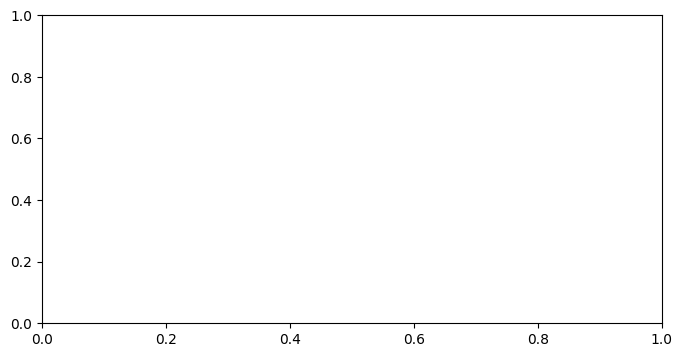

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# assume `daily` is your DataFrame with a DatetimeIndex and a column called 'Orders'
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(daily.index, daily['Orders'])

# set up the formatter to show MM/DD
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

# optionally auto-rotate & align the tick labels
fig.autofmt_xdate()

ax.set_title('Daily Orders')
ax.set_xlabel('Date (MM/DD)')
ax.set_ylabel('Orders')
plt.show()


NameError: name 'daily' is not defined

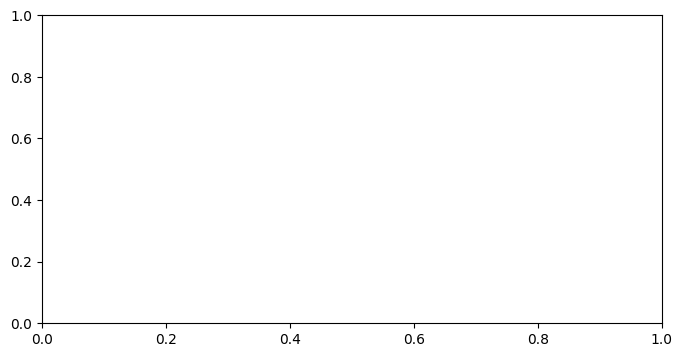

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# assume `daily` is your DataFrame with a DatetimeIndex and a column called 'Orders'
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(daily.index, daily['Sales'])

# set up the formatter to show MM/DD
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

# optionally auto-rotate & align the tick labels
fig.autofmt_xdate()

ax.set_title('Sales')
ax.set_xlabel('Date (MM/DD)')
ax.set_ylabel('Orders')
plt.show()


NameError: name 'daily' is not defined

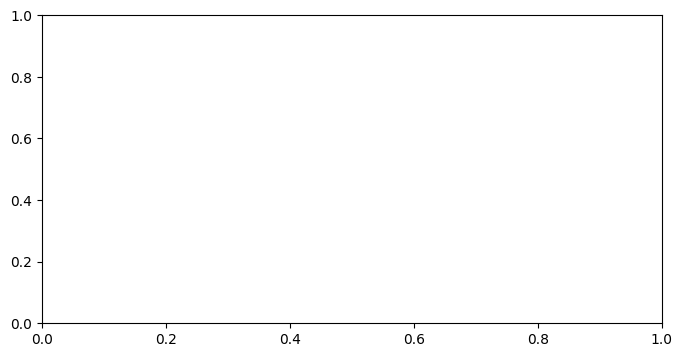

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# assume `daily` is your DataFrame with a DatetimeIndex and a column called 'Orders'
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(daily.index, daily['Average Order Value'])

# set up the formatter to show MM/DD
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

# optionally auto-rotate & align the tick labels
fig.autofmt_xdate()

ax.set_title('Sales')
ax.set_xlabel('Date (MM/DD)')
ax.set_ylabel('Orders')
plt.show()


NameError: name 'daily' is not defined

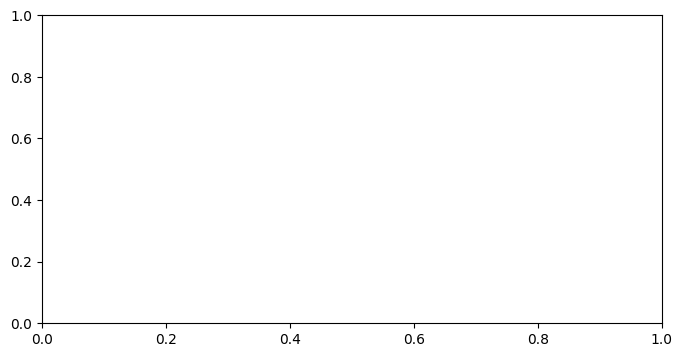

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# assume `daily` is your DataFrame with a DatetimeIndex and a column called 'Orders'
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(daily.index, daily['New Customers Acquired'])

# set up the formatter to show MM/DD
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

# optionally auto-rotate & align the tick labels
fig.autofmt_xdate()

ax.set_title('Sales')
ax.set_xlabel('Date (MM/DD)')
ax.set_ylabel('Orders')
plt.show()


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Select the metrics you want to compare
metrics = [
    'Orders',
    'Sales',
    'Average Order Value',
    'ROAS',
    'New Customers Acquired',
    # …etc
]

# 2. Perform min–max normalization per column:
daily_norm = daily[metrics].copy()
for col in metrics:
    col_min = daily_norm[col].min()
    col_max = daily_norm[col].max()
    daily_norm[col] = (daily_norm[col] - col_min) / (col_max - col_min)

# 3. Plot all normalized series
fig, ax = plt.subplots(figsize=(10, 5))
for col in metrics:
    ax.plot(daily_norm.index, daily_norm[col], label=col)

# 4. Format x-axis as MM/DD
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
fig.autofmt_xdate()

# 5. Force y-axis from 0 to 1
ax.set_ylim(0, 1)

# 6. Labels, legend, layout
ax.set_title('Daily Metrics (Min–Max Normalized)')
ax.set_xlabel('Date (MM/DD)')
ax.set_ylabel('Normalized Value (0–1)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


NameError: name 'daily' is not defined

In [13]:
import matplotlib.pyplot as plt
import numpy as np

corr = daily[metrics].corr()
fig, ax = plt.subplots(figsize=(6,6))
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_xticks(range(len(metrics)))
ax.set_yticks(range(len(metrics)))
ax.set_xticklabels(metrics, rotation=90)
ax.set_yticklabels(metrics)
plt.title("Metric Correlation", pad=20)
plt.tight_layout()
plt.show()


NameError: name 'daily' is not defined

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(daily['Orders'], model='additive', period=7)
decomp.plot()
plt.show()


ModuleNotFoundError: No module named 'statsmodels'

In [15]:
from prophet import Prophet

df_prophet = daily['Orders'].reset_index().rename(columns={'Date':'ds', 'Orders':'y'})
m = Prophet(daily_seasonality=True)
m.fit(df_prophet)
future = m.make_future_dataframe(periods=30)   # next 30 days
forecast = m.predict(future)
m.plot(forecast)
plt.show()


ModuleNotFoundError: No module named 'prophet'

In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X = daily[['DoorsDash Marketing Credit', 'Marketing Fees | (Including any applicable taxes)']]
y = daily['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = Ridge(alpha=1.0).fit(X_train, y_train)
print("Coefficients:", model.coef_)
print("R^2:", model.score(X_test, y_test))


ModuleNotFoundError: No module named 'sklearn'

In [17]:
daily['Orders_7d_ma'] = daily['Orders'].rolling(7).mean()
daily['Orders_7d_std'] = daily['Orders'].rolling(7).std()


NameError: name 'daily' is not defined